# Simple Exploration of WOT Data


- env: Python 2.7 (Sorry for using Python 2 :( But `graphlab` library can only run in Python 2.7.x env)

- Chen, from Jan. 11, 2020

----

- Discussion on Jan 15, 2020

    - Control vars: Past experience (serve as baseline)

    - DV: Growth of performance (Indicators: PR, etc)
        - Time range: One month or more months?
        
    - Construct a new dataset: Extract co-playing using SNA

In [98]:
import os
import time
import math
import numpy as np
import pandas as pd
import graphlab as gl
import matplotlib.pyplot as plt

pd.set_option('max_rows', 2000)
pd.set_option('max_columns', 300)
gl.canvas.set_target('ipynb')
# reset
# gl.canvas.set_target('browser')

In [25]:
data_folder = './data/'
source = os.listdir(data_folder)
for idx, filename in enumerate(source):
    print('fileID: %s, fileName: %s, fileSize: %s M'%(idx, filename, os.path.getsize(data_folder + filename) 
                                                      / float(1024 ** 2)))

fileID: 0, fileName: table_2.csv, fileSize: 40.4553222656 M
fileID: 1, fileName: table_3.csv, fileSize: 274.100172043 M
fileID: 2, fileName: table_1.tsv, fileSize: 8713.45498848 M


## A glimpse to `table_1.tsv` 

> - About: This table contains all battles on a particular day
>
> - Some basic findings:
>
>     - `table_1.tsv` contains 43,043,874 rows * 36 columns
>     - 12 columns cannot be inferred from existing docs

In [26]:
%%time
# if using Pandas, importing data would be a mission impossible
battle = gl.SFrame.read_csv(data_folder + source[2], 
                            header=False, 
                            delimiter='\t')

Finished parsing file /Users/lyndon/AnacondaProjects/wangliao/WOT/data/table_1.tsv

Parsing completed. Parsed 100 lines in 0.787727 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int,int,int,int,int,int,int,int,int,str,int,int,str,str,int,int,int,int,str,int,int,int,int,int,int,int,str,str,str,str,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 246979 lines. Lines per second: 171136

Read 1728833 lines. Lines per second: 245125

Read 2963830 lines. Lines per second: 244720

Read 4445771 lines. Lines per second: 256122

Read 5680699 lines. Lines per second: 251127

Read 7162668 lines. Lines per second: 253731

Read 8644749 lines. Lines per second: 256451

Read 9879772 lines. Lines per second: 252807

Read 11361700 lines. Lines per second: 252984

Read 12843663 lines. Lines per second: 254623

Read 14078711 lines. Lines per second: 252791

Read 15313589 lines. Lines per second: 251411

Read 16795461 lines. Lines per second: 251846

Read 18030487 lines. Lines per second: 250261

Read 19265442 lines. Lines per second: 249546

Read 20500484 lines. Lines per second: 249449

Read 21735452 lines. Lines per second: 248142

Read 22970526 lines. Lines per second: 246473

Read 24205473 lines. Lines per second: 244321

Read 25440473 lines. Lines per second: 242226

Read 26428432 lines. Lines per second: 239961

Read 27663370 lines. Lines per second: 238377

Read 28898410 lines. Lines per second: 237862

Read 30133385 lines. Lines per second: 237251

Read 31368316 lines. Lines per second: 235966

Read 32603259 lines. Lines per second: 235533

Read 32850250 lines. Lines per second: 222320

Read 34085297 lines. Lines per second: 222625

Read 35320325 lines. Lines per second: 222473

Read 36555430 lines. Lines per second: 222517

Read 37790367 lines. Lines per second: 223146

Read 39025386 lines. Lines per second: 223238

Read 40260335 lines. Lines per second: 222798

Read 41495366 lines. Lines per second: 222621

Read 42730375 lines. Lines per second: 222570

Finished parsing file /Users/lyndon/AnacondaProjects/wangliao/WOT/data/table_1.tsv

Parsing completed. Parsed 43043874 lines in 193.388 secs.

CPU times: user 9min 43s, sys: 17.5 s, total: 10min 1s
Wall time: 3min 16s


In [27]:
battle_1 = battle
battle_1

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
2018-03-02,1001688791,5371,86441,1,0,0,7971503771003267,0,0,Dead,107
2018-03-04,1030117817,0,84,1,0,0,41532455531610259,0,0,Dead,304
2018-03-17,1011888852,7690,11089,2,1000011646,215,34268128236899513,0,0,Dead,160
2018-03-19,1025052088,4291,5409,2,0,0,55043056846447463,14772806,0,Dead,117
2018-03-20,1022562093,2463,2829,2,1000051254,15,11046816320630794,3955515,0,Dead,219
2018-03-20,1022562093,2463,2829,2,1000051254,15,11046816320630794,3955515,0,Dead,219
2018-03-09,1005199243,5484,25591,1,1000010436,1522,17850993704353163,0,0,Dead,156
2018-03-29,1017641348,3713,40054,1,1000023668,619,5906535037059825,0,0,Alive,276
2018-03-22,1022889983,1756,830,1,0,0,5907845001494237,0,0,Dead,399
2018-03-05,1000519973,3049,2435,2,0,0,40675003965684398,0,0,Dead,242


In [29]:
# infer the columns
temp = list()
for idx in range(1, 37):
    temp.append('X' + str(idx))

col_names = ['date', 'userID', 'PR', 'battleCount', 'teamID', 'clanID', 'daysInClan', 'battleID', 'platoonID', 
             'isLegionnaire', 'isDead', 'amountOfTime', 'tankID', 'tankType', 'tankTier', 
             'unknown_1', 'unknown_2', 'unknown_3', 'unknown_4', 'unknown_5', 'unknown_6', 
             'unknown_7', 'unknown_8', 'unknown_9', 'avrPRUserTeam', 'avrPREnemyTeam', 'teamSize', 
             'battleType', 'battleResult', 'battleStartTime', 'battleEndTime', 'battleTimeDur', 'chatEntries', 
             'unknown_10', 'unknown_11', 'unknown_12']

columns = pd.DataFrame({'glField': temp, 'colName': col_names})
columns = columns[['glField', 'colName']]
columns

,glField,colName
0,X1,date
1,X2,userID
2,X3,PR
3,X4,battleCount
4,X5,teamID
5,X6,clanID
6,X7,daysInClan
7,X8,battleID
8,X9,platoonID
9,X10,isLegionnaire


### num of users

> `X2` = `userID`
>
> Result: 279,313 users

In [30]:
# battle_1['X2'] = battle_1['X2'].astype(str)
# battle_1['X2'].sketch_summary()

In [32]:
%%time
# double check
print(len(set(list(battle_1['X2']))))

279313
CPU times: user 18.2 s, sys: 1.04 s, total: 19.2 s
Wall time: 20.7 s


### distribution of battle(s) / user

> `X2` = `userID`, `X8` = `battleID`
>
> A rough histogram

In [33]:
battle_per_user = battle_1.groupby(key_columns='X2', operations={'count': gl.aggregate.COUNT('X8')})
battle_per_user['count'].sketch_summary()


+--------------------+---------------+----------+
|        item        |     value     | is exact |
+--------------------+---------------+----------+
|       Length       |     279313    |   Yes    |
|        Min         |      1.0      |   Yes    |
|        Max         |     6521.0    |   Yes    |
|        Mean        | 154.106232077 |   Yes    |
|        Sum         |   43043874.0  |   Yes    |
|      Variance      | 63013.9983384 |   Yes    |
| Standard Deviation | 251.025891769 |   Yes    |
|  # Missing Values  |       0       |   Yes    |
|  # unique values   |      2062     |    No    |
+--------------------+---------------+----------+

Most frequent items:
+-------+-------+-------+-------+------+------+------+------+------+------+------+
| value |   1   |   2   |   3   |  4   |  5   |  6   |  7   |  8   |  9   |  10  |
+-------+-------+-------+-------+------+------+------+------+------+------+------+
| count | 16380 | 12966 | 10402 | 8891 | 7745 | 6983 | 6165 | 5425 | 4724 | 42

In [34]:
battle_per_user['count'].show(view='Numeric')

### num of battles

> `X8` = `battleID`
>
> Result: 1,825,553 battles

In [35]:
%%time
# battle_1['X8'] = battle_1['X8'].astype(str)
print(len(set(list(battle_1['X8']))))

1825553
CPU times: user 20.9 s, sys: 1.71 s, total: 22.6 s
Wall time: 27.6 s


### distribution of battle types

> `X28` = `battleType`
>
> Result: 12 kinds of battle types, the most common one is `REGULAR` (p = 94.33%)

In [37]:
battleTypes = list(set(battle_1['X28']))
for i, j in enumerate(battleTypes): print (i + 1, j)

(1, 'RANKED')
(2, 'EPIC_RANDOM')
(3, 'FORT_BATTLE_2')
(4, 'TRAINING')
(5, 'BOOTCAMP')
(6, 'GLOBAL_MAP')
(7, 'CYBERSPORT')
(8, 'SANDBOX')
(9, 'REGULAR')
(10, 'EPIC_RANDOM_TRAINING')
(11, 'SORTIE_2')
(12, 'RATED_SANDBOX')


In [38]:
battle_1['X28'].show()

### amount of time user was in the battle total

> `X12` = `amountOfTime` (amount of time user was in the battle total)
>
> A rough histogram

In [39]:
battle_1['X12'].show(view='Numeric')

#### amount of time by battle type

> `X28` = `battleType`
>
> `X12` = `amountOfTime`

In [40]:
battle_time_by_type = battle_1.groupby(key_columns='X28', operations={'min': gl.aggregate.MIN('X12'), 
                                                                      'max': gl.aggregate.MAX('X12')})
battle_time_by_type

X28,max,min
RANKED,900,7
REGULAR,900,4
CYBERSPORT,420,20
TRAINING,1800,0
GLOBAL_MAP,900,15
BOOTCAMP,900,0
SORTIE_2,600,4
EPIC_RANDOM_TRAINING,1800,0
EPIC_RANDOM,900,14
FORT_BATTLE_2,600,19


### distribution of battle start time

> `X30` = `battleStartTime`
>
> Result: Earliest start time: `2018-03-01 00:00:00`, Latest start time: `2018-03-31 23:59:59`

In [41]:
%%time
battle_1['stTimestamp'] = battle_1['X30'].apply(lambda x: time.mktime(time.strptime(x, "%Y-%m-%d %H:%M:%S")))

CPU times: user 66.2 ms, sys: 391 ms, total: 457 ms
Wall time: 15.7 s


In [42]:
battle_1['stTimestamp'].sketch_summary()


+--------------------+-------------------+----------+
|        item        |       value       | is exact |
+--------------------+-------------------+----------+
|       Length       |      43043874     |   Yes    |
|        Min         |    1519891200.0   |   Yes    |
|        Max         |    1522565999.0   |   Yes    |
|        Mean        |   1521273188.26   |   Yes    |
|        Sum         | 6.54814914351e+16 |   Yes    |
|      Variance      | 6.12386349619e+11 |   Yes    |
| Standard Deviation |   782551.180192   |   Yes    |
|  # Missing Values  |         0         |   Yes    |
|  # unique values   |      1274735      |    No    |
+--------------------+-------------------+----------+

Most frequent items:
 -- All elements appear with less than 0.01% frequency -- 

Quantiles: 
+--------------+--------------+--------------+--------------+--------------+
|      0%      |      1%      |      5%      |     25%      |     50%      |
+--------------+--------------+--------------+---

In [43]:
# calculate the exact start time and end time
print('Earliest: %s\nLatest time: %s'%(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(1519891200.0)), 
      time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(1522565999.0))))

Earliest: 2018-03-01 00:00:00
Latest time: 2018-03-31 23:59:59


In [44]:
battle_1['stInterval'] = battle_1['stTimestamp'] - 1519891200.0
battle_1['stInterval'].show(view='Numeric')

### distribution of battle time duration

> `X32` = `battleTimeDur`
>
> A rough histogram
>
> Question: What's the difference between `X32` (battle time duration) and `X12` (amount of time user was in the battle total)?

In [45]:
battle_1['X32'].sketch_summary()


+--------------------+---------------+----------+
|        item        |     value     | is exact |
+--------------------+---------------+----------+
|       Length       |    43043874   |   Yes    |
|        Min         |      0.0      |   Yes    |
|        Max         |     1800.0    |   Yes    |
|        Mean        | 382.422491479 |   Yes    |
|        Sum         | 16460945538.0 |   Yes    |
|      Variance      | 18105.6713565 |   Yes    |
| Standard Deviation |  134.55731625 |   Yes    |
|  # Missing Values  |       0       |   Yes    |
|  # unique values   |      1449     |    No    |
+--------------------+---------------+----------+

Most frequent items:
+-------+--------+--------+--------+--------+--------+--------+--------+--------+
| value |  600   |  900   |  331   |  322   |  321   |  311   |  305   |  330   |
+-------+--------+--------+--------+--------+--------+--------+--------+--------+
| count | 321960 | 298746 | 178699 | 178473 | 176620 | 176603 | 176569 | 176483 |

In [46]:
battle_1['X32'].show(view='Numeric')

### distribution of team chat entries in battle

> `X33` = `chatEntries`

In [47]:
battle_1['X33'].sketch_summary()


+--------------------+---------------+----------+
|        item        |     value     | is exact |
+--------------------+---------------+----------+
|       Length       |    43043874   |   Yes    |
|        Min         |      0.0      |   Yes    |
|        Max         |     358.0     |   Yes    |
|        Mean        | 4.04948344101 |   Yes    |
|        Sum         |  174305455.0  |   Yes    |
|      Variance      | 118.142038547 |   Yes    |
| Standard Deviation |  10.869316379 |   Yes    |
|  # Missing Values  |       0       |   Yes    |
|  # unique values   |      269      |    No    |
+--------------------+---------------+----------+

Most frequent items:
+-------+----------+--------+--------+--------+--------+--------+--------+
| value |    0     |   10   |   11   |   9    |   12   |   8    |   13   |
+-------+----------+--------+--------+--------+--------+--------+--------+
| count | 34186393 | 383940 | 383773 | 380790 | 374385 | 366835 | 361465 |
+-------+----------+-------

In [48]:
battle_1['X33'].show(view='Numeric')

### maybe a DV: users' PR growth

> `X1` = `date`, `X2` = `userID`, `X3` = `PR`

In [56]:
battle_2 = battle_1
battle_2['X1'] = battle_2['X1'].apply(lambda x: str(int(x.split('-')[-1])))

In [60]:
battle_2.shape

(43043874, 38)

In [69]:
user_PR = battle_2.groupby(key_columns='X2', operations={'min': gl.aggregate.MIN('X3')})
battle_2 = battle_2.join(user_PR, ['X2'])

In [130]:
battle_2.shape

(43043874, 40)

In [87]:
battle_2['impro'] = battle_2['X3'] - battle_2['min']
PRGrowth = battle_2.groupby(key_columns=['X1'], operations={'growthM': gl.aggregate.MEAN('impro'), 
                                                            'growthSD': gl.aggregate.STD('impro'), 
                                                            'growthNum': gl.aggregate.COUNT('impro')})

- This block intends to check the trend of improvement

In [144]:
battle_3 = battle_2

In [145]:
%%time
check_userID = [1011888852]
check = battle_3.filter_by(check_userID, 'X2')
print(check.shape)

(471, 40)
CPU times: user 5min 38s, sys: 6.78 s, total: 5min 45s
Wall time: 48.7 s


In [146]:
check = pd.DataFrame(check)[['X1', 'X2', 'impro']]
check['X1'] = check['X1'].apply(pd.to_numeric)
check = check.sort_values(by='X1')
check

,X1,X2,impro
411,1,1011888852,16
261,1,1011888852,15
246,1,1011888852,12
57,1,1011888852,12
383,1,1011888852,17
216,1,1011888852,16
191,1,1011888852,11
190,1,1011888852,12
78,1,1011888852,13
33,1,1011888852,12


In [95]:
PRGrowth['upper'] = PRGrowth.apply(lambda x: x['growthM'] + 1.96 * (x['growthSD'] / math.sqrt(x['growthNum'])))
PRGrowth['lower'] = PRGrowth.apply(lambda x: x['growthM'] - 1.96 * (x['growthSD'] / math.sqrt(x['growthNum'])))
PRGrowth.print_rows(num_rows=31, num_columns=10)

+----+---------------+---------------+-----------+---------------+---------------+
| X1 |    growthSD   |    growthM    | growthNum |     upper     |     lower     |
+----+---------------+---------------+-----------+---------------+---------------+
| 12 | 853.805483798 | 242.909253078 |  1213661  | 244.428282945 | 241.390223211 |
| 8  | 807.497175921 | 217.960882922 |  1166626  | 219.426198808 | 216.495567036 |
| 2  | 771.422790461 | 168.422587552 |  1264732  | 169.767051878 | 167.078123226 |
| 23 | 868.131370077 | 259.454564333 |  1415727  | 260.884616116 |  258.02451255 |
| 26 | 889.028623172 | 283.411764182 |  1460552  | 284.853591678 | 281.969936687 |
| 29 |  889.63694391 | 303.865419855 |  1344656  | 305.369127071 | 302.361712638 |
| 11 | 829.983449696 | 227.952716584 |  1658848  | 229.215771423 | 226.689661745 |
| 10 |  825.36584531 | 223.356182187 |  1578139  | 224.643927383 | 222.068436991 |
| 19 | 864.824475086 | 266.590028566 |  1254985  | 268.103118617 | 265.076938515 |
| 30

In [103]:
PRGrowth_1 = pd.DataFrame(PRGrowth)
PRGrowth_1['X1'] = PRGrowth_1['X1'].apply(pd.to_numeric)
PRGrowth_1 = PRGrowth_1.sort_values(by='X1', ascending=True, axis=0)
PRGrowth_1

,X1,growthM,growthNum,growthSD,lower,upper
17,1,159.867088,1181749,772.104159,158.474991,161.259184
2,2,168.422588,1264732,771.422790,167.078123,169.767052
28,3,177.001618,1589929,771.252474,175.802771,178.200465
13,4,188.215003,1642710,792.452203,187.003154,189.426853
24,5,199.809254,1224064,810.467831,198.373468,201.245041
20,6,208.644330,1166104,801.831891,207.188969,210.099691
19,7,214.863223,1178703,813.874540,213.393920,216.332526
1,8,217.960883,1166626,807.497176,216.495567,219.426199
25,9,221.946837,1227641,816.129352,220.503129,223.390545
7,10,223.356182,1578139,825.365845,222.068437,224.643927


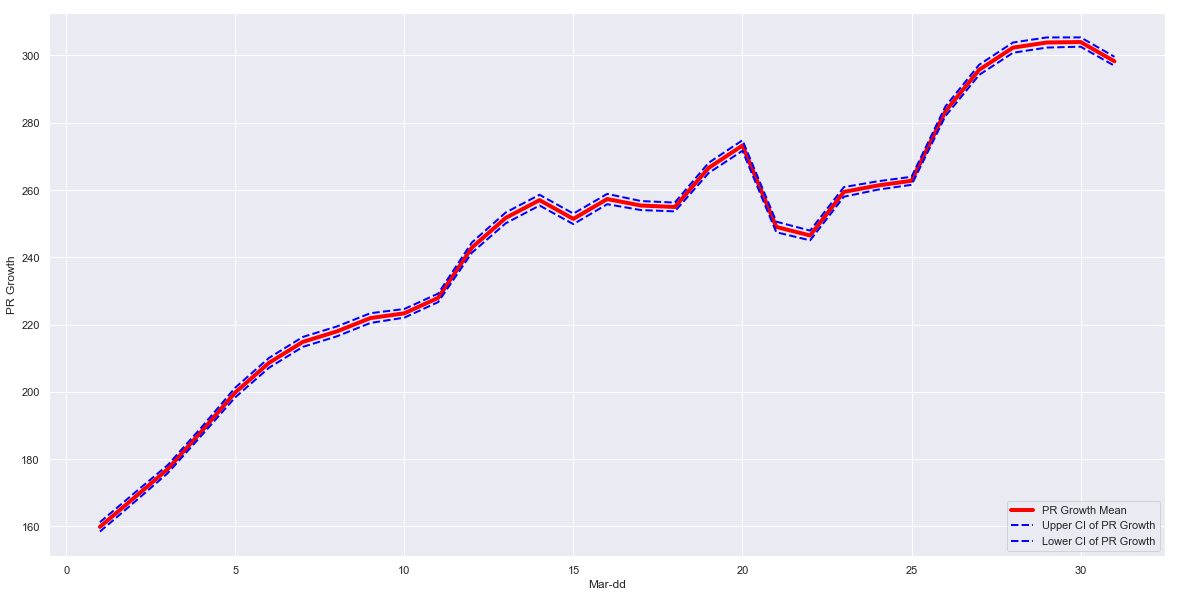

In [116]:
plt.figure(figsize=(20, 10), facecolor='w')
plt.plot(PRGrowth_1['X1'], PRGrowth_1['growthM'], color='red', label='PR Growth Mean', linewidth=4)
plt.plot(PRGrowth_1['X1'], PRGrowth_1['upper'], color='blue', label='Upper CI of PR Growth', 
         linewidth=2, linestyle='dashed')
plt.plot(PRGrowth_1['X1'], PRGrowth_1['lower'],  color='blue', label='Lower CI of PR Growth', 
         linewidth=2, linestyle='dashed')
plt.legend(loc='lower right')
plt.xlabel('Mar-dd')
plt.ylabel('PR Growth')
plt.show()

## A glimpse to `table_3.csv`

> About: User table

In [49]:
%%time
user = gl.SFrame.read_csv(data_folder + source[1], 
                          header=True, 
                          column_type_hints={'battle_cnt_sandbox': int})

Finished parsing file /Users/lyndon/AnacondaProjects/wangliao/WOT/data/table_3.csv

Parsing completed. Parsed 100 lines in 0.924042 secs.

Read 792355 lines. Lines per second: 691828

Finished parsing file /Users/lyndon/AnacondaProjects/wangliao/WOT/data/table_3.csv

Parsing completed. Parsed 4344092 lines in 4.41944 secs.

CPU times: user 19.9 s, sys: 607 ms, total: 20.5 s
Wall time: 6.86 s


In [52]:
user_1 = user
user_1

spa_key,first_battle_dt,country_name,lang,battle_cnt_sandbox,bttl_training_cnt_in_first_month ...,purchase
1030092313,2018-03-03 19:54:44,Ukraine,ru,0,0,0.0
1001054194,2011-07-24 08:31:35,Australia,en,0,0,0.0
1004501051,2013-04-10 23:59:59,United States,en,0,0,0.0
1002037736,2012-03-10 23:59:59,United States,en,0,0,0.0
1002678822,2012-07-09 23:59:59,United States,en,0,0,0.0
1000446568,2013-08-09 23:59:59,United States,en,0,0,0.0
1020071257,2016-04-23 18:22:51,Canada,en,0,0,0.0
1017894257,2016-01-03 15:52:12,Norway,en,0,0,0.0
1022808564,2016-10-28 20:00:04,Ukraine,en,0,0,0.0
1009757176,2015-06-27 12:31:50,United States,en,0,0,0.0


### user's battle count in sandbox matches

In [53]:
user_1['battle_cnt_sandbox'].sketch_summary()


+--------------------+------------------+----------+
|        item        |      value       | is exact |
+--------------------+------------------+----------+
|       Length       |     4344092      |   Yes    |
|        Min         |       0.0        |   Yes    |
|        Max         |       67.0       |   Yes    |
|        Mean        | 0.00450542944302 |   Yes    |
|        Sum         |     19572.0      |   Yes    |
|      Variance      | 0.0373260556487  |   Yes    |
| Standard Deviation |   0.1931995229   |   Yes    |
|  # Missing Values  |        0         |   Yes    |
|  # unique values   |        42        |    No    |
+--------------------+------------------+----------+

Most frequent items:
+-------+---------+------+------+-----+-----+-----+-----+-----+-----+-----+
| value |    0    |  1   |  2   |  3  |  4  |  5  |  10 |  6  |  7  |  9  |
+-------+---------+------+------+-----+-----+-----+-----+-----+-----+-----+
| count | 4337624 | 3287 | 1079 | 574 | 365 | 227 | 222 | 16

In [54]:
user_1['battle_cnt_sandbox'].show(view='Numeric')